In [1]:
# Importing necessary libraries for data manipulation, visualization, and analysis
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For enhanced data visualizations
import geopandas as gpd  # For geospatial data manipulation
from shapely import wkt  # For handling Well-Known Text (WKT) geometries
import folium  # For creating interactive maps
import networkx as nx  # For network analysis
import scipy.stats as stats  # For statistical computations
from scipy.stats import shapiro  # For Shapiro-Wilk test for normality

## **Análisis preliminar:**

In [2]:

# Load the dataset from a CSV file
# Using relative path for portability and ensuring the file exists in the specified location
df = pd.read_csv('..\data.csv')  # Ensure the file path is correct and accessible

In [3]:
# Display the first few rows of the DataFrame
# This is useful for quickly inspecting the structure, column names, and sample data of the DataFrame.
df.head()

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,RH2M,WS10M,WD10M,PS,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DIFF,T2MDEW,T2MWET,WS50M,ALLSKY_KT,LOCALITY,NBHD
0,2020,1,1,0,26.66,0.03,86.19,7.87,40.0,100.66,0.0,-999.0,0.0,24.19,25.42,10.13,-999.0,Centro,BarrioAbajo
1,2020,1,1,1,26.56,0.03,85.81,8.02,41.8,100.58,0.0,-999.0,0.0,24.01,25.29,10.31,-999.0,Centro,BarrioAbajo
2,2020,1,1,2,26.43,0.02,85.59,8.05,42.7,100.52,0.0,-999.0,0.0,23.84,25.14,10.33,-999.0,Centro,BarrioAbajo
3,2020,1,1,3,26.35,0.00,84.96,8.01,43.7,100.49,0.0,-999.0,0.0,23.63,24.99,10.25,-999.0,Centro,BarrioAbajo
4,2020,1,1,4,26.27,0.00,84.21,7.88,45.6,100.49,0.0,-999.0,0.0,23.42,24.85,10.08,-999.0,Centro,BarrioAbajo


In [4]:
# Display the shape of the DataFrame (number of rows and columns)
# This is useful for understanding the size of the dataset and ensuring it was loaded correctly
df.shape

(1535519, 19)

In [5]:
# Display the columns of the DataFrame
# This is useful for understanding the structure of the dataset, 
# including the names of the columns, which can help in identifying 
# the variables available for analysis or further processing.
df.columns

Index(['YEAR', 'MO', 'DY', 'HR', 'T2M', 'PRECTOTCORR', 'RH2M', 'WS10M',
       'WD10M', 'PS', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SRF_ALB',
       'ALLSKY_SFC_SW_DIFF', 'T2MDEW', 'T2MWET', 'WS50M', 'ALLSKY_KT',
       'LOCALITY', 'NBHD'],
      dtype='object')

### **Variables: análisis de tipos,nulos y Nan values**


- **T2M:** MERRA-2 Temperatura a 2 Metros (°C)
- **RH2M:** MERRA-2 Humedad Relativa a 2 Metros (%)
- **PRECTOTCORR:** MERRA-2 Precipitación Corregida (mm/hora)
- **WS10M:** MERRA-2 Velocidad del Viento a 10 Metros (m/s)
- **WD10M:** MERRA-2 Dirección del Viento a 10 Metros (Grados)
- **PS:** MERRA-2 Presión Superficial (kPa)
- **ALLSKY_SFC_UV_INDEX:** CERES SYN1deg Índice UV en Superficie Bajo Cielo Total (W m-2 x 40)
- **ALLSKY_SFC_SW_DIFF:** CERES SYN1deg Irradiancia Difusa de Onda Corta en Superficie Bajo Cielo Total (Wh/m^2)
- **ALLSKY_SRF_ALB:** CERES SYN1deg Albedo Superficial Bajo Cielo Total (adimensional)
- **T2MDEW:** MERRA-2 Punto de Rocío/Escarcha a 2 Metros (°C)
- **T2MWET:** MERRA-2 Temperatura de Bulbo Húmedo a 2 Metros (°C)
- **WS50M:** MERRA-2 Velocidad del Viento a 50 Metros (m/s)
- **ALLSKY_KT:** CERES SYN1deg Índice de Claridad de Insolación Bajo Cielo Total (adimensional)	
- **LOCALITY:** Es la localidad
- **NHBD:**	 Neighborhood, es el barrio donde fueron tomados los datos.	
---
- **Variables que seran creadas más adelante:**
- **SolarIndex:** Índice compuesto del potencial solar, calculado a partir de la irradiancia difusa, índice de claridad e intensidad UV. Representa la aptitud energética solar en  cada punto.
- **ICU_Index:** Índice de Isla de Calor Urbana, calculado como una combinación normalizada de temperatura, humedad, presión y viento. Refleja la intensidad térmica urbana local.
- **ICU_Categoria:** Clasificación categórica del ICU_Index en niveles como “Sin efecto de isla de calor”, “Leve”, “Moderada” o “Intensa”.
---

En el análisis de datos  tipo meteorológicos y climáticos, es común encontrar **valores faltantes** que no pueden ser calculados o que están fuera del rango de disponibilidad de las fuentes. Estos valores en este caso han sido representados con un código específico, como **-999**, para indicar su ausencia. En este contexto, se trabajó con un conjunto de variables. Estos mismos, provenientes de fuentes como **MERRA-2** y **CERES SYN1deg**, son fundamentales para estudios climáticos, pero requieren un manejo cuidadoso de los **valores faltantes** para garantizar la precisión y confiabilidad de los análisis.

In [6]:
# Display the data types of each column in the DataFrame
# This is useful for understanding the structure of the dataset, 
# ensuring that the data types are as expected, and identifying 
# any potential issues (e.g., numeric columns stored as objects).
df.dtypes

YEAR                     int64
MO                       int64
DY                       int64
HR                       int64
T2M                    float64
PRECTOTCORR            float64
RH2M                   float64
WS10M                  float64
WD10M                  float64
PS                     float64
ALLSKY_SFC_UV_INDEX    float64
ALLSKY_SRF_ALB         float64
ALLSKY_SFC_SW_DIFF     float64
T2MDEW                 float64
T2MWET                 float64
WS50M                  float64
ALLSKY_KT              float64
LOCALITY                object
NBHD                    object
dtype: object

In [7]:
# Display the number of missing values in each column
# This is useful for identifying columns with missing data, which may require cleaning or imputation
print(df.isnull().sum())

YEAR                   0
MO                     0
DY                     0
HR                     0
T2M                    0
PRECTOTCORR            0
RH2M                   0
WS10M                  0
WD10M                  0
PS                     0
ALLSKY_SFC_UV_INDEX    0
ALLSKY_SRF_ALB         0
ALLSKY_SFC_SW_DIFF     0
T2MDEW                 0
T2MWET                 0
WS50M                  0
ALLSKY_KT              0
LOCALITY               0
NBHD                   0
dtype: int64


In [8]:
# Count the occurrences of the placeholder value -999 in each column
# This is useful for identifying columns with placeholder values that may need to be replaced or handled
count_neg_999 = (df == -999).sum()

# Display the count of -999 values for each column
# This helps in understanding the extent of placeholder values in the dataset
print("\nCount of -999 values in each column:")
print(count_neg_999)


Count of -999 values in each column:
YEAR                        0
MO                          0
DY                          0
HR                          0
T2M                         0
PRECTOTCORR                 0
RH2M                        0
WS10M                       0
WD10M                       0
PS                          0
ALLSKY_SFC_UV_INDEX    130425
ALLSKY_SRF_ALB         365040
ALLSKY_SFC_SW_DIFF     579409
T2MDEW                      0
T2MWET                      0
WS50M                       0
ALLSKY_KT              814249
LOCALITY                    0
NBHD                        0
dtype: int64


In [9]:
# Select only numeric columns to avoid modifying categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Replace placeholder value -999.0 with NaN ONLY in numeric columns
df_cleaned = df.copy()  # Create a copy of the original DataFrame to preserve raw data
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].replace(-999.0, np.nan)

# Calculate the percentage of missing values per column without altering text columns
missing_per_col = df_cleaned.isnull().sum() / len(df_cleaned) * 100  # Percentage of missing values per column

# Calculate the total percentage of missing values in the entire dataset
total_missing = df_cleaned.isnull().sum().sum()  # Total number of missing values
total_values = df_cleaned.size  # Total number of values in the dataset
missing_percentage = (total_missing / total_values) * 100  # Overall percentage of missing values

# Display the results for better understanding of missing data
print("Percentage of missing values per variable:\n", missing_per_col)
print("\nTotal percentage of missing values:", round(missing_percentage, 2), "%")

Percentage of missing values per variable:
 YEAR                    0.000000
MO                      0.000000
DY                      0.000000
HR                      0.000000
T2M                     0.000000
PRECTOTCORR             0.000000
RH2M                    0.000000
WS10M                   0.000000
WD10M                   0.000000
PS                      0.000000
ALLSKY_SFC_UV_INDEX     8.493871
ALLSKY_SRF_ALB         23.773070
ALLSKY_SFC_SW_DIFF     37.733756
T2MDEW                  0.000000
T2MWET                  0.000000
WS50M                   0.000000
ALLSKY_KT              53.027608
LOCALITY                0.000000
NBHD                    0.000000
dtype: float64

Total percentage of missing values: 6.48 %


El dataset presenta un **6.48%** de datos faltantes en general, pero este porcentaje varía considerablemente entre las variables. Las variables con mayor porcentaje de datos faltantes son:
Variable	Porcentaje de Datos Faltantes
- **ALLSKY_SFC_UV_INDEX**	8.49%
- **ALLSKY_SRF_ALB**	23.77%
- **ALLSKY_SFC_SW_DIFF**	37.73%
- **ALLSKY_KT**	53.03%
Estos valores faltantes están representados con el valor -999, que indica que los datos no pudieron calcularse o están fuera del rango de disponibilidad de las fuentes.
Los porcentajes anteriormente mostrados se pueden visualizar de una mejor manera en las graficas siguientes:

### **Análisis de correlación:**

In [10]:
# Select only numeric columns for correlation analysis
# This ensures that only numerical data is included in the correlation matrix,
# avoiding errors or irrelevant results caused by non-numeric data.
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

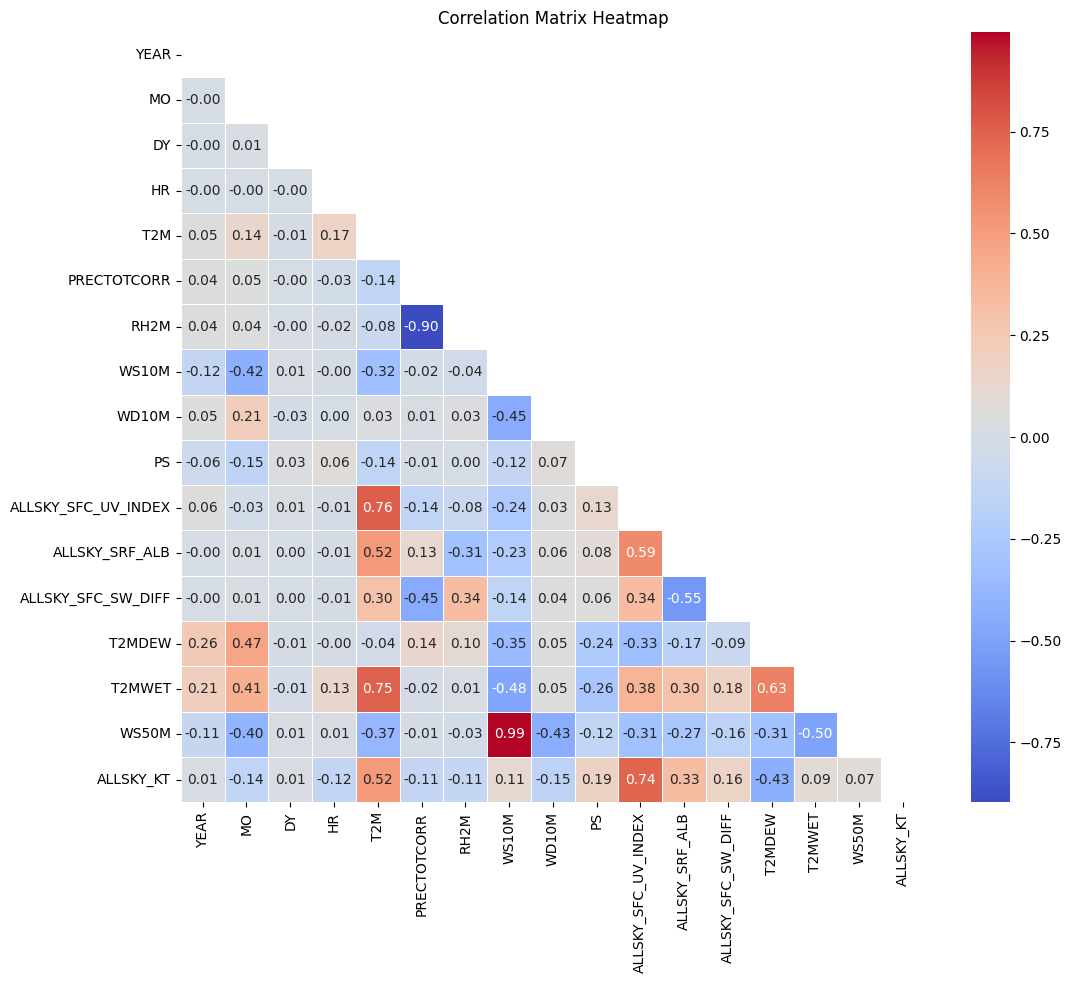

In [11]:
# Calculate the correlation matrix for numeric columns
corr_matrix = df_cleaned[numeric_cols].corr()

# Create a mask to hide the upper triangle of the heatmap for better readability
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))  # Set the figure size for better visualization
sns.heatmap(
    corr_matrix,  # Correlation matrix as input
    mask=mask,  # Apply the mask to hide the upper triangle
    annot=True,  # Annotate the heatmap with correlation values
    cmap='coolwarm',  # Use a diverging colormap for better contrast
    fmt='.2f',  # Format the annotations to 2 decimal places
    linewidths=0.5  # Add lines between cells for clarity
)
plt.title("Correlation Matrix Heatmap")  # Add a title for context
plt.show()  # Display the heatmap


#### **Análisis de Correlación entre Variables Climáticas**

La matriz de correlación permite identificar relaciones lineales entre variables climáticas registradas. A continuación, se resumen los hallazgos más relevantes:

---

##### 1. Relaciones fuertemente positivas

- **ALLSKY_SFC_UV_INDEX y T2M** (0.76):  
  Existe una fuerte correlación positiva entre la temperatura del aire a 2 metros y el índice UV en superficie, lo cual es coherente con condiciones tropicales donde una mayor radiación directa incrementa la temperatura ambiental.

- **T2MWET y T2M** (0.75):  
  La temperatura de bulbo húmedo está fuertemente ligada a la temperatura ambiente, como es esperado por su definición física.

- **WS10M y WS50M** (0.99):  
  Estas dos variables presentan una correlación casi perfecta. Se recomienda utilizar solo una de ellas para evitar redundancia en modelos.

- **ALLSKY_SRF_ALB y ALLSKY_SFC_SW_DIFF** (0.59):  
  El albedo superficial guarda relación con la irradiancia difusa, probablemente debido al efecto combinado de reflexión y dispersión de la radiación solar.

---

##### 2. Relaciones fuertemente negativas

- **RH2M y T2M** (-0.90):  
  Correlación negativa muy alta entre humedad relativa y temperatura. A mayor temperatura, la humedad relativa tiende a disminuir si no hay aporte de vapor de agua.

- **RH2M y WS10M / WD10M** (-0.50 a -0.45):  
  Muestran que altos niveles de humedad están asociados con menor ventilación, posiblemente por condiciones atmosféricas más estables.

- **ALLSKY_SFC_SW_DIFF y T2MWET** (-0.55):  
  La irradiancia difusa decrece en condiciones de alta humedad, representadas por la temperatura de bulbo húmedo.

---

##### 3. Correlaciones moderadas a bajas

- **ALLSKY_KT con variables solares/atmosféricas**:  
  - Con `T2M` (0.52), `UV_INDEX` (0.19): el índice de claridad influye en la radiación pero no es el único factor.  
  - Con `RH2M` (-0.24), `WS50M` (-0.50): puede reflejar condiciones más turbias o nubladas.

- **ALLSKY_SRF_ALB con otras variables**:  
  Correlaciones moderadas con presión superficial, humedad y UV sugieren sensibilidad del albedo a condiciones locales.

---

##### Conclusiones

- Variables como `T2M`, `T2MWET` y `T2MDEW` presentan multicolinealidad. Se recomienda realizar selección de variables o aplicar reducción de dimensionalidad (por ejemplo, PCA).
- `WS10M` y `WS50M` son redundantes. Puede seleccionarse solo una para análisis o modelado.
- La matriz de correlación confirma la relación esperada entre radiación, temperatura y humedad, y respalda la construcción de índices como `SolarIndex`.




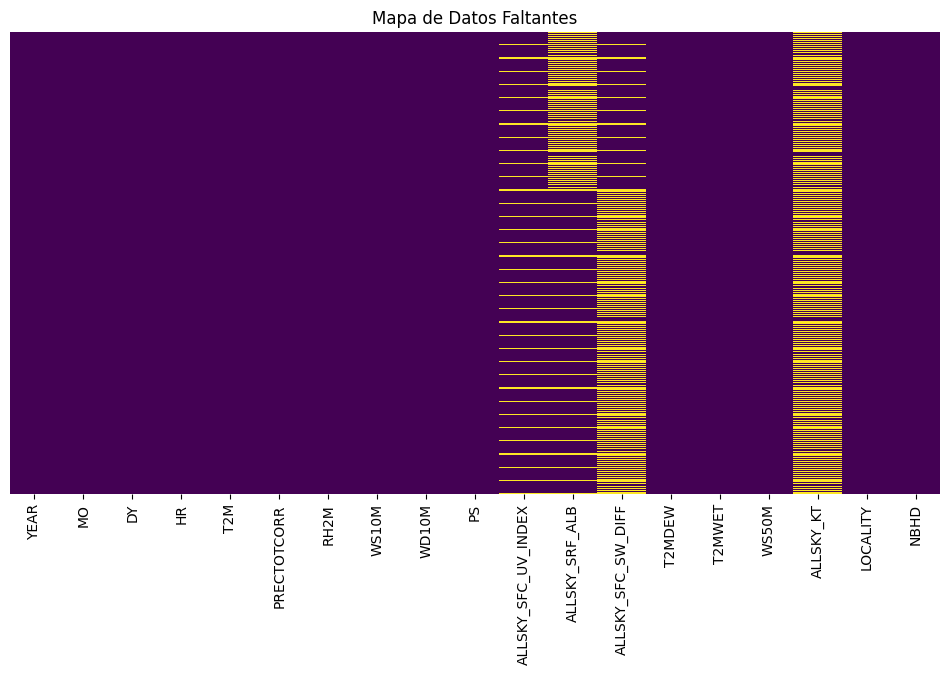

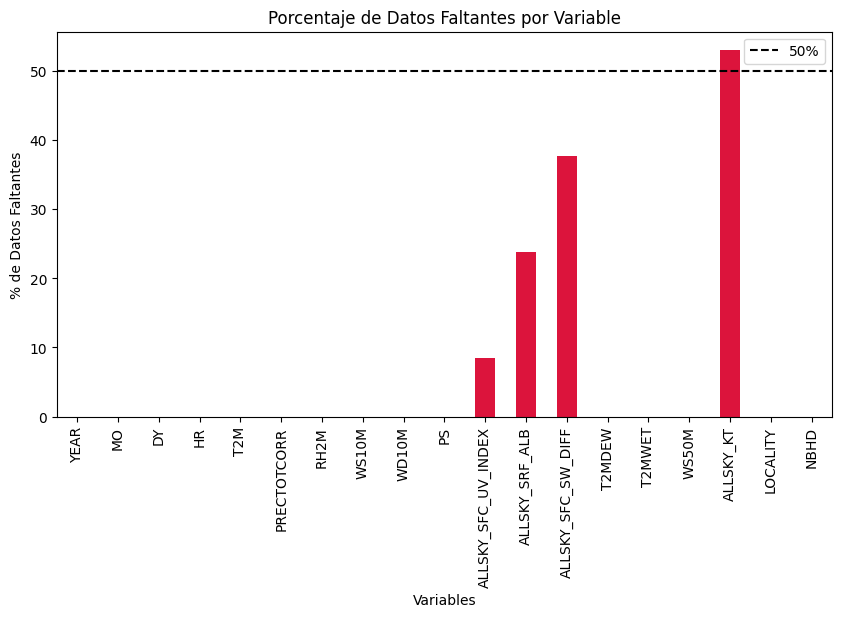

In [12]:
# Create a heatmap to visualize missing values in the DataFrame
# This helps identify patterns or clusters of missing data across variables
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
sns.heatmap(df_cleaned.isnull(), cmap="viridis", cbar=False, yticklabels=False)  # Use a colormap for visual clarity
plt.title("Mapa de Datos Faltantes")  # Add a title for context
plt.show()  # Display the heatmap

# Plot the percentage of missing values for each column
# This provides a quantitative view of missing data for each variable
plt.figure(figsize=(10, 5))  # Set the figure size for better visualization
missing_per_col.plot(kind="bar", color="crimson")  # Use a bar plot with a distinct color for emphasis
plt.axhline(y=50, color="black", linestyle="--", label="50%")  # Add a reference line at 50% for context
plt.xlabel("Variables")  # Label the x-axis for clarity
plt.ylabel("% de Datos Faltantes")  # Label the y-axis for clarity
plt.title("Porcentaje de Datos Faltantes por Variable")  # Add a title for context
plt.legend()  # Add a legend to explain the reference line
plt.show()  # Display the bar plot

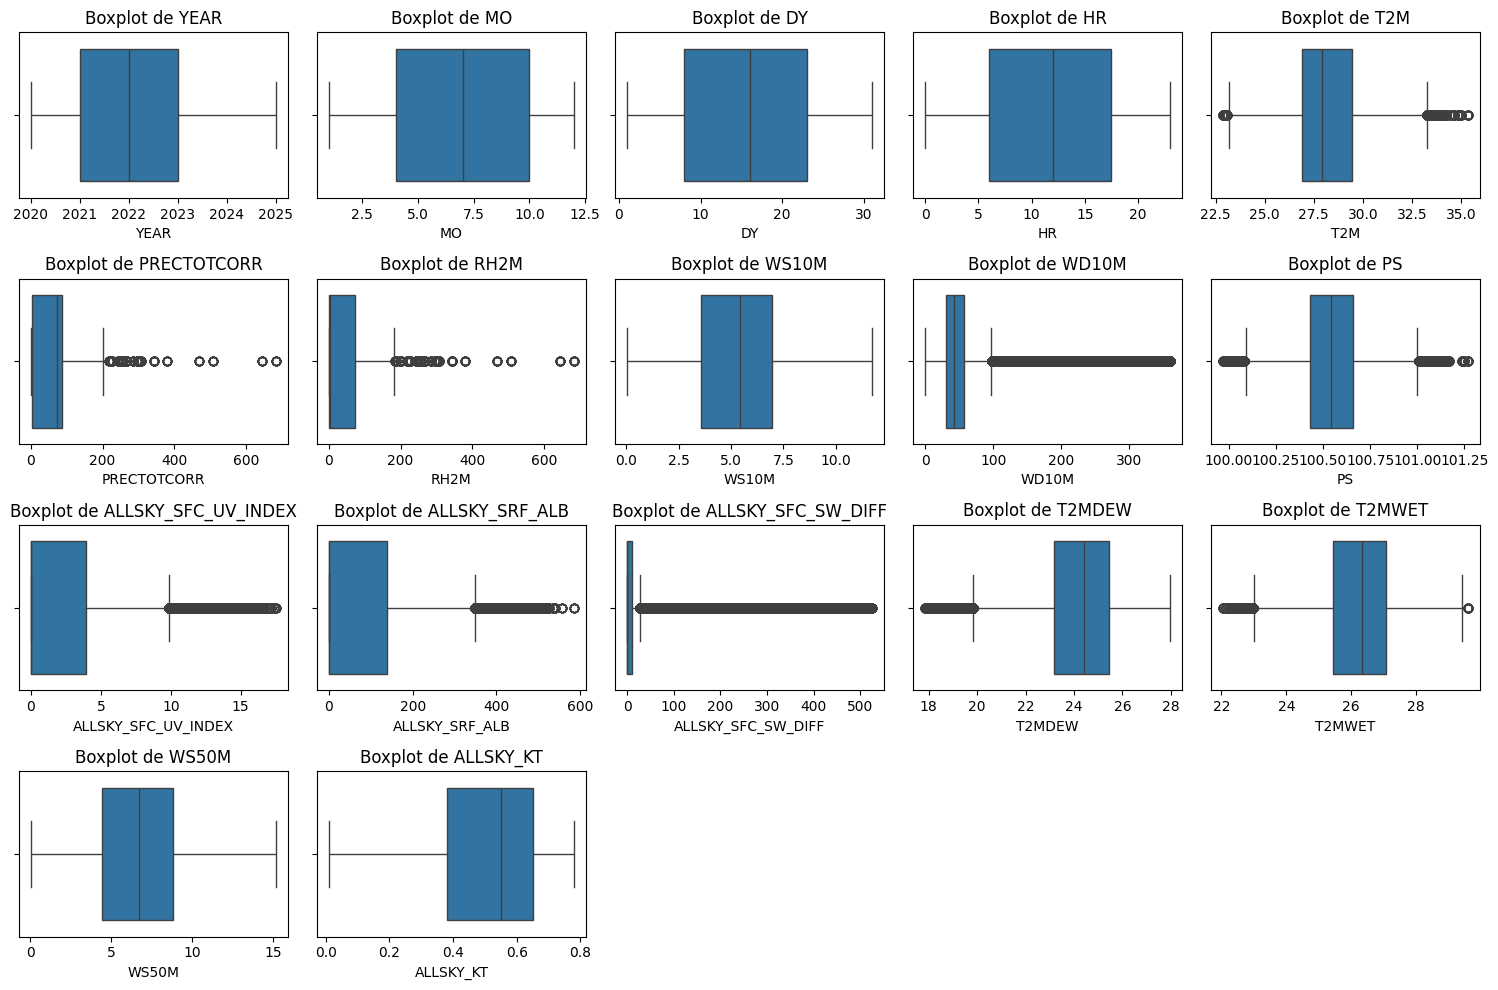

In [13]:
# Select numeric columns for outlier analysis
# This ensures that only numerical data is included in the boxplot visualization,
# avoiding errors or irrelevant results caused by non-numeric data.
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Create a boxplot for each numeric column to visualize potential outliers
plt.figure(figsize=(15, 10))  # Set the figure size for better readability
for i, col in enumerate(numeric_cols, 1):  # Enumerate through numeric columns for plotting
    plt.subplot(4, 5, i)  # Create a subplot grid (4 rows, 5 columns)
    sns.boxplot(data=df_cleaned, x=col)  # Generate a boxplot for the current column
    plt.title(f'Boxplot de {col}')  # Add a title to each subplot for context

plt.tight_layout()  # Adjust subplot spacing to prevent overlap
plt.show()  # Display the boxplots

In [14]:
# Display the first few rows of the cleaned DataFrame
# This is useful for quickly inspecting the structure, column names, and sample data of the cleaned dataset.
df_cleaned.head()

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,RH2M,WS10M,WD10M,PS,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DIFF,T2MDEW,T2MWET,WS50M,ALLSKY_KT,LOCALITY,NBHD
0,2020,1,1,0,26.66,0.03,86.19,7.87,40.0,100.66,0.0,NaN,0.0,24.19,25.42,10.13,NaN,Centro,BarrioAbajo
1,2020,1,1,1,26.56,0.03,85.81,8.02,41.8,100.58,0.0,NaN,0.0,24.01,25.29,10.31,NaN,Centro,BarrioAbajo
2,2020,1,1,2,26.43,0.02,85.59,8.05,42.7,100.52,0.0,NaN,0.0,23.84,25.14,10.33,NaN,Centro,BarrioAbajo
3,2020,1,1,3,26.35,0.00,84.96,8.01,43.7,100.49,0.0,NaN,0.0,23.63,24.99,10.25,NaN,Centro,BarrioAbajo
4,2020,1,1,4,26.27,0.00,84.21,7.88,45.6,100.49,0.0,NaN,0.0,23.42,24.85,10.08,NaN,Centro,BarrioAbajo


In [15]:
# Display the summary statistics of the cleaned DataFrame
# Using the `round` function to limit the number of decimal places to 2 for better readability
# This provides a quick overview of the central tendency, dispersion, and shape of the dataset's distribution
round(df_cleaned.describe(), 2)

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,RH2M,WS10M,WD10M,PS,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DIFF,T2MDEW,T2MWET,WS50M,ALLSKY_KT
count,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1405094.00,1170479.00,956110.00,1535519.00,1535519.00,1535519.00,721270.00
mean,2022.00,6.52,15.73,11.50,28.21,53.68,29.63,5.29,66.46,100.55,2.38,72.09,45.04,24.25,26.23,6.64,0.51
std,1.42,3.45,8.81,6.92,1.82,37.99,38.15,2.21,76.95,0.17,3.74,110.75,93.78,1.54,1.17,2.84,0.17
min,2020.00,1.00,1.00,0.00,22.88,0.00,0.00,0.04,0.00,99.97,0.00,0.00,0.00,17.85,22.05,0.04,0.01
25%,2021.00,4.00,8.00,6.00,26.91,2.60,0.09,3.56,30.30,100.43,0.00,0.00,0.02,23.19,25.44,4.44,0.38
50%,2022.00,7.00,16.00,12.00,27.93,71.73,3.13,5.41,42.00,100.54,0.00,0.15,0.13,24.43,26.33,6.73,0.55
75%,2023.00,10.00,23.00,17.50,29.46,86.14,73.71,6.97,57.20,100.66,3.95,139.15,11.10,25.43,27.08,8.79,0.65
max,2025.00,12.00,31.00,23.00,35.36,684.23,684.23,11.72,359.80,101.27,17.52,585.10,525.32,27.97,29.61,15.15,0.78


In [16]:
# Create a copy of the cleaned DataFrame to apply logical limits
df_cleaned_limits = df_cleaned.copy()

# Define logical limits for each variable
# These limits are based on domain knowledge to ensure data consistency and validity
limits = {
    'YEAR': {'min': 2020, 'max': 2025},  # Valid range for years
    'MO': {'min': 1, 'max': 12},        # Months should be between 1 and 12
    'DY': {'min': 1, 'max': 31},        # Days should be between 1 and 31
    'HR': {'min': 0, 'max': 23},        # Hours should be between 0 and 23
    'T2M': {'min': -90, 'max': 60},     # Temperature range in Celsius
    'RH2M': {'min': 0, 'max': 100},     # Relative humidity in percentage
    'PRECTOTCORR': {'min': 0, 'max': 300},  # Precipitation in mm/hour
    'WS10M': {'min': 0, 'max': 80},     # Wind speed at 10m in m/s
    'WD10M': {'min': 0, 'max': 360},    # Wind direction in degrees
    'PS': {'min': 50, 'max': 110},      # Surface pressure in kPa
    'ALLSKY_SFC_UV_INDEX': {'min': 0, 'max': 15},  # UV index
    'ALLSKY_SFC_SW_DIFF': {'min': 0, 'max': 1500}, # Diffuse solar radiation in Wh/m²
    'ALLSKY_SRF_ALB': {'min': 0, 'max': 1},        # Surface albedo (dimensionless)
    'T2MDEW': {'min': -45, 'max': 35},  # Dew point temperature in Celsius
    'T2MWET': {'min': -35, 'max': 35},  # Wet-bulb temperature in Celsius
    'WS50M': {'min': 0, 'max': 75},     # Wind speed at 50m in m/s
    'ALLSKY_KT': {'min': 0, 'max': 1},  # Clearness index (dimensionless)
}

# Apply the defined limits to each column in the DataFrame
# Replace values outside the defined range with NaN to indicate invalid data
for col, lim in limits.items():
    df_cleaned_limits[col] = df_cleaned_limits[col].apply(
        lambda x: np.nan if x < lim['min'] or x > lim['max'] else x
    )

# Display the first few rows of the DataFrame to verify the applied limits
# This step ensures that the data cleaning process was successful
df_cleaned_limits.head()

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,RH2M,WS10M,WD10M,PS,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DIFF,T2MDEW,T2MWET,WS50M,ALLSKY_KT,LOCALITY,NBHD
0,2020,1,1,0,26.66,0.03,86.19,7.87,40.0,100.66,0.0,NaN,0.0,24.19,25.42,10.13,NaN,Centro,BarrioAbajo
1,2020,1,1,1,26.56,0.03,85.81,8.02,41.8,100.58,0.0,NaN,0.0,24.01,25.29,10.31,NaN,Centro,BarrioAbajo
2,2020,1,1,2,26.43,0.02,85.59,8.05,42.7,100.52,0.0,NaN,0.0,23.84,25.14,10.33,NaN,Centro,BarrioAbajo
3,2020,1,1,3,26.35,0.00,84.96,8.01,43.7,100.49,0.0,NaN,0.0,23.63,24.99,10.25,NaN,Centro,BarrioAbajo
4,2020,1,1,4,26.27,0.00,84.21,7.88,45.6,100.49,0.0,NaN,0.0,23.42,24.85,10.08,NaN,Centro,BarrioAbajo


Una vez aplicado el filtrado por límites lógicos a cada variable del dataset, se procede al cálculo de las variables objetivo a partir de los datos preexistentes. Estas nuevas variables derivadas permitirán abordar los análisis y modelos posteriores con una base de datos consistente y depurada.

In [31]:
# Calculate the maximum value of the UV index for normalization
# This step ensures that the UV index is scaled between 0 and 1 for consistent calculations
uv_max = df_cleaned_limits["ALLSKY_SFC_UV_INDEX"].max()

# Create a new column 'SolarIndex' using a formula that combines multiple variables
# - Convert ALLSKY_SFC_SW_DIFF from Wh/m² to kWh/m² by dividing by 1000
# - Normalize ALLSKY_SFC_UV_INDEX by dividing by its maximum value (uv_max)
# This composite index represents the solar energy potential at each data point
df_cleaned_limits["SolarIndex"] = (
    (df_cleaned_limits["ALLSKY_SFC_SW_DIFF"] / 1000) *  # Wh/m² → kWh/m²
    (df_cleaned_limits["ALLSKY_SFC_UV_INDEX"] / uv_max) # Normalizar UV
)

# Display the first few rows of the updated DataFrame to verify the new column
# This step helps ensure that the 'SolarIndex' column was created correctly
df_cleaned_limits.head(20)


# Does not include ALLSKY_KT, therefore:
# - Does not penalize for turbid atmospheric conditions.
# - Assumes an "ideal" or average atmosphere for all cases.
# Additionally, ALLSKY_KT is not used because it has more than 50% missing data.

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,RH2M,WS10M,WD10M,PS,...,ALLSKY_SFC_SW_DIFF,T2MDEW,T2MWET,WS50M,ALLSKY_KT,LOCALITY,NBHD,SolarIndex,ICU_Index,ICU_Categoria
0,2020,1,1,0,26.66,0.03,86.19,7.87,40.0,100.66,...,0.00,24.19,25.42,10.13,NaN,Centro,BarrioAbajo,0.000000,0.944358,Isla de calor moderada
1,2020,1,1,1,26.56,0.03,85.81,8.02,41.8,100.58,...,0.00,24.01,25.29,10.31,NaN,Centro,BarrioAbajo,0.000000,0.924931,Isla de calor moderada
2,2020,1,1,2,26.43,0.02,85.59,8.05,42.7,100.52,...,0.00,23.84,25.14,10.33,NaN,Centro,BarrioAbajo,0.000000,0.916495,Isla de calor moderada
3,2020,1,1,3,26.35,0.00,84.96,8.01,43.7,100.49,...,0.00,23.63,24.99,10.25,NaN,Centro,BarrioAbajo,0.000000,0.911345,Isla de calor moderada
4,2020,1,1,4,26.27,0.00,84.21,7.88,45.6,100.49,...,0.00,23.42,24.85,10.08,NaN,Centro,BarrioAbajo,0.000000,0.912675,Isla de calor moderada
5,2020,1,1,5,26.20,0.00,83.65,7.80,48.5,100.51,...,0.00,23.23,24.71,10.02,NaN,Centro,BarrioAbajo,0.000000,0.911921,Isla de calor moderada
6,2020,1,1,6,26.22,0.00,83.05,7.58,51.6,100.58,...,22.18,23.14,24.68,9.65,0.27,Centro,BarrioAbajo,0.000044,0.925258,Isla de calor moderada
7,2020,1,1,7,26.85,0.00,79.78,7.18,53.7,100.68,...,128.03,23.08,24.96,8.88,0.45,Centro,BarrioAbajo,0.003670,0.944505,Isla de calor moderada
8,2020,1,1,8,28.00,0.00,72.01,6.97,55.7,100.76,...,192.92,22.49,25.24,8.54,0.55,Centro,BarrioAbajo,0.024694,0.917245,Isla de calor moderada
9,2020,1,1,9,29.11,0.00,65.72,6.34,56.3,100.78,...,219.85,22.02,25.57,7.69,0.63,Centro,BarrioAbajo,0.065955,0.939491,Isla de calor moderada


In [32]:
# Calculate the maximum values for temperature (T2M) and wind speed (WS10M)
# These values will be used to normalize the respective variables
t_max = df_cleaned_limits["T2M"].max()
ws_max = df_cleaned_limits["WS10M"].max()

# Create a new column 'ICU_Index' to represent the Urban Heat Island (UHI) effect
# The formula combines normalized temperature, relative humidity, and wind speed
# Higher temperature and humidity increase the index, while higher wind speed decreases it
df_cleaned_limits["ICU_Index"] = (
    (df_cleaned_limits["T2M"] / t_max) +  # Normalize temperature by dividing by its maximum value
    (df_cleaned_limits["RH2M"] / 100) -   # Normalize relative humidity (percentage) by dividing by 100
    (df_cleaned_limits["WS10M"] / ws_max) # Normalize wind speed by dividing by its maximum value
)

df_cleaned_limits['ICU_Index'].describe()




count    1.533288e+06
mean     6.400144e-01
std      4.322587e-01
min     -2.527840e-01
25%      2.837838e-01
50%      5.578153e-01
75%      1.002827e+00
max      1.738198e+00
Name: ICU_Index, dtype: float64

<Axes: >

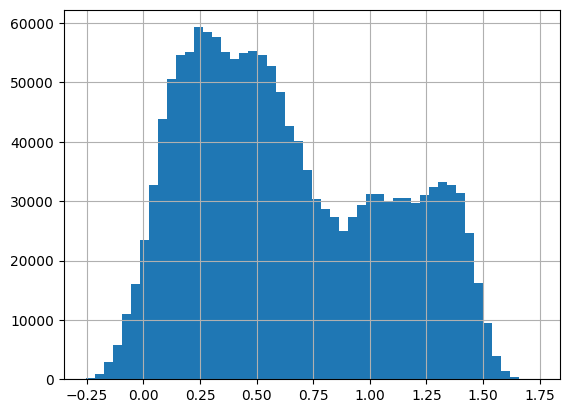

In [33]:
df_cleaned_limits['ICU_Index'].hist(bins=50)

In [37]:
# Define bins and labels for categorizing the ICU_Index into meaningful categories
# Bins represent ranges of ICU_Index values, and labels describe the severity of the UHI effect
bins = [-np.inf, 0.28, 0.56, 1.00, np.inf]  # Define the ranges for categorization
labels = [
    "Sin efecto de isla de calor",  # No UHI effect
    "Isla de calor leve",           # Mild UHI effect
    "Isla de calor moderada",       # Moderate UHI effect
    "Isla de calor intensa"         # Intense UHI effect
]

# Create a new column 'ICU_Categoria' to categorize the ICU_Index based on the defined bins and labels
# Use the pd.cut() function to assign each row to a category
df_cleaned_limits["ICU_Categoria"] = pd.cut(df_cleaned_limits["ICU_Index"], bins=bins, labels=labels)

In [38]:
# Display the data types of each column in the DataFrame
# This is useful for understanding the structure of the dataset,
# ensuring that the data types are as expected, and identifying
# any potential issues (e.g., numeric columns stored as objects).
df_cleaned_limits.dtypes

YEAR                      int64
MO                        int64
DY                        int64
HR                        int64
T2M                     float64
PRECTOTCORR             float64
RH2M                    float64
WS10M                   float64
WD10M                   float64
PS                      float64
ALLSKY_SFC_UV_INDEX     float64
ALLSKY_SRF_ALB          float64
ALLSKY_SFC_SW_DIFF      float64
T2MDEW                  float64
T2MWET                  float64
WS50M                   float64
ALLSKY_KT               float64
LOCALITY                 object
NBHD                     object
SolarIndex              float64
ICU_Index               float64
ICU_Categoria          category
dtype: object

In [39]:
# Display the summary statistics of the DataFrame with limits applied
# Using the `round` function to limit the number of decimal places to 2 for better readability
# This provides a quick overview of the central tendency, dispersion, and shape of the dataset's distribution
round(df_cleaned_limits.describe(), 2)

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,RH2M,WS10M,WD10M,PS,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DIFF,T2MDEW,T2MWET,WS50M,ALLSKY_KT,SolarIndex,ICU_Index
count,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535387.00,1533288.00,1535519.00,1535519.00,1535519.00,1401749.00,696538.00,956110.00,1535519.00,1535519.00,1535519.00,721270.00,952540.00,1533288.00
mean,2022.00,6.52,15.73,11.50,28.21,53.65,29.41,5.29,66.46,100.55,2.35,0.05,45.04,24.25,26.23,6.64,0.51,0.02,0.64
std,1.42,3.45,8.81,6.92,1.82,37.82,37.51,2.21,76.95,0.17,3.69,0.07,93.78,1.54,1.17,2.84,0.17,0.05,0.43
min,2020.00,1.00,1.00,0.00,22.88,0.00,0.00,0.04,0.00,99.97,0.00,0.00,0.00,17.85,22.05,0.04,0.01,0.00,-0.25
25%,2021.00,4.00,8.00,6.00,26.91,2.60,0.09,3.56,30.30,100.43,0.00,0.00,0.02,23.19,25.44,4.44,0.38,0.00,0.28
50%,2022.00,7.00,16.00,12.00,27.93,71.73,3.12,5.41,42.00,100.54,0.00,0.00,0.13,24.43,26.33,6.73,0.55,0.00,0.56
75%,2023.00,10.00,23.00,17.50,29.46,86.14,73.53,6.97,57.20,100.66,3.88,0.14,11.10,25.43,27.08,8.79,0.65,0.00,1.00
max,2025.00,12.00,31.00,23.00,35.36,295.23,99.91,11.72,359.80,101.27,15.00,0.99,525.32,27.97,29.61,15.15,0.78,0.43,1.74


In [40]:
# Display the percentage and count of missing data for each column
# Using a lambda function to calculate the percentage of missing values
# and format the output to include both percentage and count for better clarity
print("Porcentaje y cantidad de datos faltantes por columna:\n")
print(df_cleaned_limits.isnull().sum().apply(
    lambda x: f"{(x / len(df_cleaned_limits)) * 100:.2f}% ({x})"
))

Porcentaje y cantidad de datos faltantes por columna:

YEAR                         0.00% (0)
MO                           0.00% (0)
DY                           0.00% (0)
HR                           0.00% (0)
T2M                          0.00% (0)
PRECTOTCORR                0.01% (132)
RH2M                      0.15% (2231)
WS10M                        0.00% (0)
WD10M                        0.00% (0)
PS                           0.00% (0)
ALLSKY_SFC_UV_INDEX     8.71% (133770)
ALLSKY_SRF_ALB         54.64% (838981)
ALLSKY_SFC_SW_DIFF     37.73% (579409)
T2MDEW                       0.00% (0)
T2MWET                       0.00% (0)
WS50M                        0.00% (0)
ALLSKY_KT              53.03% (814249)
LOCALITY                     0.00% (0)
NBHD                         0.00% (0)
SolarIndex             37.97% (582979)
ICU_Index                 0.15% (2231)
ICU_Categoria             0.15% (2231)
dtype: object


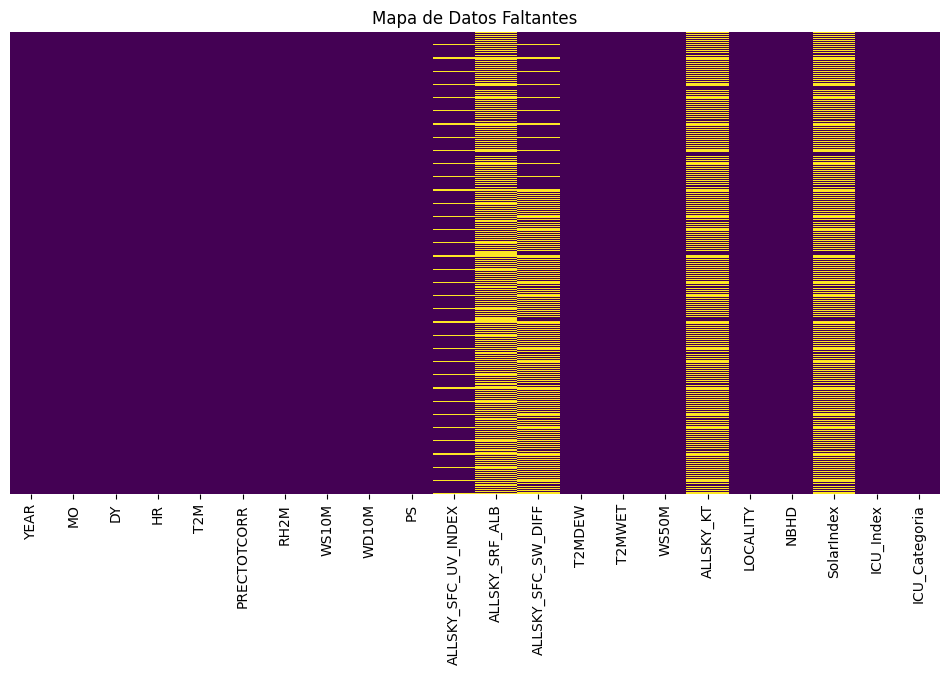

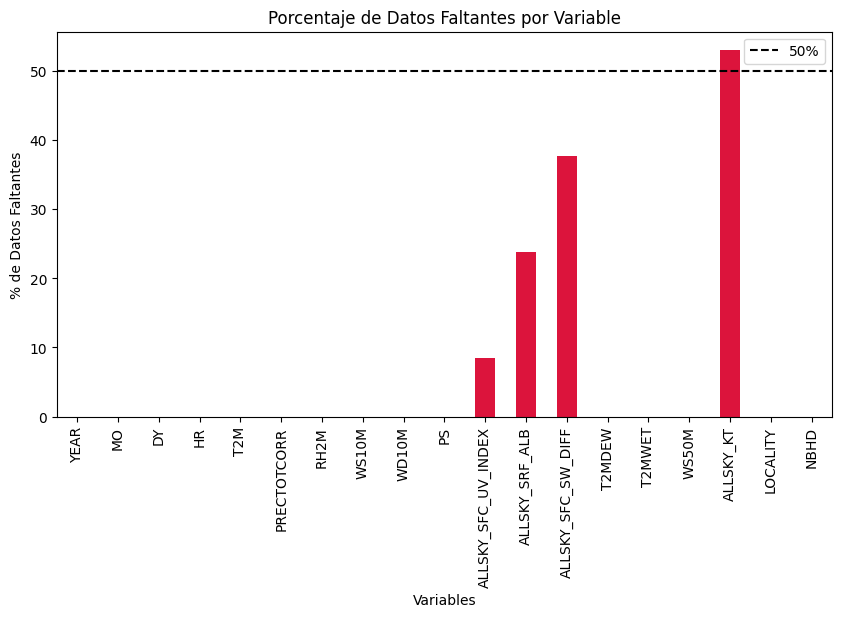

In [24]:
# Create a heatmap to visualize missing values in the DataFrame
# This helps identify patterns or clusters of missing data across variables
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
sns.heatmap(df_cleaned_limits.isnull(), cmap="viridis", cbar=False, yticklabels=False)  # Use a colormap for visual clarity
plt.title("Mapa de Datos Faltantes")  # Add a title for context
plt.show()  # Display the heatmap

# Plot the percentage of missing values for each column
# This provides a quantitative view of missing data for each variable
plt.figure(figsize=(10, 5))  # Set the figure size for better visualization
missing_per_col.plot(kind="bar", color="crimson")  # Use a bar plot with a distinct color for emphasis
plt.axhline(y=50, color="black", linestyle="--", label="50%")  # Add a reference line at 50% for context
plt.xlabel("Variables")  # Label the x-axis for clarity
plt.ylabel("% de Datos Faltantes")  # Label the y-axis for clarity
plt.title("Porcentaje de Datos Faltantes por Variable")  # Add a title for context
plt.legend()  # Add a legend to explain the reference line
plt.show()  # Display the bar plot

In [25]:
# Extract unique localities from the 'LOCALITY' column of the cleaned DataFrame
# This provides a list of distinct localities present in the dataset, which can be useful for further analysis or filtering
localidades = df_cleaned_limits['LOCALITY'].unique()

# Print the unique localities for verification and understanding of the dataset's geographical coverage
print("Localidades únicas:", localidades)

Localidades únicas: ['Centro' 'Sur' 'Occidente' 'Oriente' 'Norte']


In [26]:
# Select categorical columns for analysis
# Using 'object' dtype to identify text-based columns such as 'LOCALITY' and 'NBHD'
categorical_cols = df_cleaned_limits.select_dtypes(include=['object']).columns

# Select numeric columns for analysis
# Using 'number' dtype to identify columns with numerical data for statistical or mathematical operations
numeric_cols = df_cleaned_limits.select_dtypes(include=['number']).columns

In [29]:
print("Categorical columns:", categorical_cols)  # Print the categorical columns for verification

Categorical columns: Index(['LOCALITY', 'NBHD'], dtype='object')


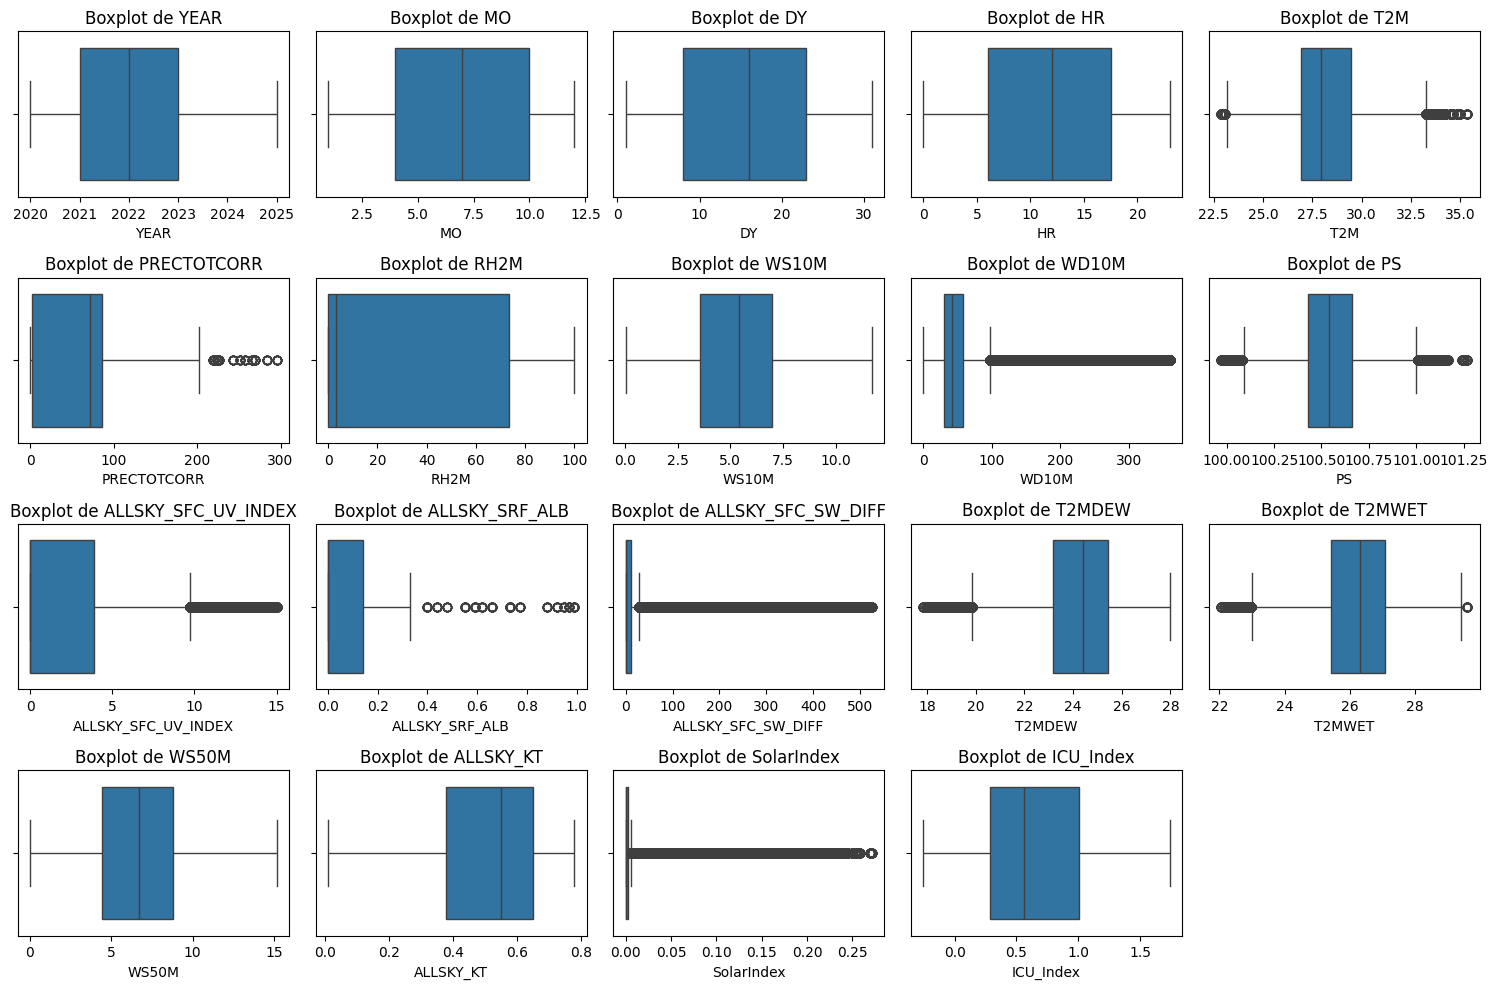

In [27]:
# Set the figure size for better readability of the boxplots
plt.figure(figsize=(15, 10))

# Iterate through each numeric column to create individual boxplots
for i, col in enumerate(numeric_cols, 1):  # Enumerate to get both index and column name
    plt.subplot(4, 5, i)  # Create a subplot grid (4 rows, 5 columns)
    sns.boxplot(data=df_cleaned_limits, x=col)  # Generate a boxplot for the current column
    plt.title(f'Boxplot de {col}')  # Add a title to each subplot for context

# Adjust subplot spacing to prevent overlap and improve layout
plt.tight_layout()

# Display all the boxplots
plt.show()

### **Análisis de Normalidad y Distribución de Variables**

In [28]:

# Perform the Shapiro-Wilk test for normality on numeric columns
# Store the results (statistic and p-value) in a dictionary for better organization
normality_results = {}
for col in numeric_cols:
    # Drop NaN values before performing the test to avoid errors
    stat, p_value = stats.shapiro(df_cleaned_limits[col].dropna())
    normality_results[col] = {'Statistic': stat, 'p-value': p_value}

# Convert the results dictionary into a DataFrame for better readability and analysis
normality_df = pd.DataFrame(normality_results).T
print("Shapiro-Wilk Test Results for Normality:")
print(normality_df)

# Perform the Chi-squared test for independence on categorical columns
# Store the results (Chi-squared statistic, p-value, and degrees of freedom) in a dictionary
chi2_results = {}
for col in categorical_cols:
    # Create a contingency table for the Chi-squared test
    contingency_table = pd.crosstab(df_cleaned_limits['LOCALITY'], df_cleaned_limits[col])
    # Perform the Chi-squared test
    chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi2': chi2, 'p-value': p, 'dof': dof}

# Convert the results dictionary into a DataFrame for better readability and analysis
chi2_df = pd.DataFrame(chi2_results).T
print("\nChi-squared Test Results for Categorical Variables:")
print(chi2_df)


c:\Users\jesus\miniconda3\envs\testml_env\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test Results for Normality:
                     Statistic  p-value
YEAR                  0.902474      0.0
MO                    0.943161      0.0
DY                    0.951996      0.0
HR                    0.945347      0.0
T2M                   0.982821      0.0
PRECTOTCORR           0.766861      0.0
RH2M                  0.704668      0.0
WS10M                 0.988252      0.0
WD10M                 0.572860      0.0
PS                    0.996135      0.0
ALLSKY_SFC_UV_INDEX   0.687594      0.0
ALLSKY_SRF_ALB        0.656792      0.0
ALLSKY_SFC_SW_DIFF    0.554192      0.0
T2MDEW                0.983023      0.0
T2MWET                0.991703      0.0
WS50M                 0.988792      0.0
ALLSKY_KT             0.940963      0.0
SolarIndex            0.494346      0.0
ICU_Index             0.954432      0.0

Chi-squared Test Results for Categorical Variables:
                  Chi2  p-value    dof
LOCALITY  6.142076e+06      0.0   16.0
NBHD      4.167836e+06      

#### **Prueba de Normalidad (Shapiro-Wilk)**

El test de normalidad de Shapiro-Wilk proporciona un valor estadístico y un **p-valor**. Si el **p-valor** es menor a 0.05, se rechaza la hipótesis nula de que la variable sigue una distribución normal. Este test es sensible para grandes volúmenes de datos; sin embargo, sigue siendo útil para detectar desviaciones significativas.

---

##### **Resultados destacados**

##### **Variables con mejor ajuste relativo a la normalidad**
(Aunque todas las variables tienen p-valores de 0.0, algunas presentan estadísticas más cercanas a 1.0, lo que indica menor desviación de la normalidad):

- **PS** (Presión superficial): estadístico = 0.996  
- **T2MWET** (Temperatura húmeda a 2 metros): 0.992  
- **WS50M** (Viento a 50 metros): 0.989  
- **WS10M** (Viento a 10 metros): 0.988  
- **T2MDEW** (Punto de rocío a 2 metros): 0.983  
- **T2M** (Temperatura a 2 metros): 0.983  
- **ICU_Index** (Índice de isla de calor): 0.954  

Estas variables muestran una leve desviación de la normalidad, aunque no cumplen el criterio estricto (p < 0.05). Su distribución se aproxima más a la normal que las demás.

---

##### **Variables que presentan mayor desviación de la normalidad**
(Estadísticos muy alejados de 1.0):

- **ALLSKY_SFC_SW_DIFF** (Irradiancia difusa): 0.554  
- **WD10M** (Dirección del viento): 0.573  
- **ALLSKY_SRF_ALB** (Albedo): 0.657  
- **ALLSKY_SFC_UV_INDEX** (Índice UV): 0.688  
- **RH2M** (Humedad relativa): 0.705  
- **PRECTOTCORR** (Precipitación): 0.767  
- **SolarIndex** (Índice de energía solar): 0.494  

Estas variables presentan una distribución altamente sesgada o multimodal, lo que indica una fuerte desviación respecto a la normalidad.

---

##### **Variables temporales** 
(Todas tienen p-valores de 0.0 y estadísticos < 0.96):

- **YEAR**: 0.902  
- **MO** (Mes): 0.943  
- **DY** (Día): 0.952  
- **HR** (Hora): 0.945  

Como era esperable, las variables temporales no siguen una distribución normal, ya que se distribuyen de manera discreta o estacional.

---

##### **Prueba de Independencia Chi-Cuadrado**

La prueba de Chi-cuadrado evalúa si existe independencia estadística entre variables categóricas. Se aplicó entre `LOCALITY`, `NBHD` y otras variables categóricas.

- **LOCALITY**  
  - $\chi^2 = 6,142,076$, $p = 0.0$, $df = 16$  
  - Resultado: distribución altamente no uniforme entre localidades.

- **NBHD**  
  - $\chi^2 = 4,167,836$, $p = 0.0$, $df = 100$  
  - Resultado: la distribución de registros entre barrios tampoco es homogénea.

Esto sugiere que existen patrones espaciales relevantes en los datos, donde ciertas localidades o barrios concentran mayor cantidad de observaciones.

---

##### **Conclusiones**

- Ninguna variable numérica sigue una distribución normal según el test de Shapiro-Wilk.
- Algunas variables (como presión y temperatura) se aproximan a la normalidad, mientras que otras muestran distribuciones claramente sesgadas.
- Las variables categóricas `LOCALITY` y `NBHD` muestran distribuciones altamente no uniformes, lo que indica diferencias sustanciales entre zonas geográficas en el conjunto de datos.


Debido a que ninguna variable es sigue una distribución normal, para las variables con NA´s se emplearán diferentes técnicas de amputación, empezaremos con ALLSKY_SFC_UV_INDEX, ya Que es la variable con menos porcentaje de datos nulos (aproximadamente 8.5% de NA's), a la cual se le aplicará la imputación por la mediana. 

#### **Limpieza Final**

In [41]:
df_final = df_cleaned_limits.copy()  # Create a temporary copy for testing

# === 1. Remove columns with more than 50% missing values ===
# Good practice: Drop columns with excessive missing data to avoid bias or unreliable analysis
cols_to_drop = ['ALLSKY_SRF_ALB', 'ALLSKY_KT']
df_final.drop(columns=cols_to_drop, inplace=True)

# === 2. Impute missing values with the global median for variables with few missing values ===
# Good practice: Use the median for imputation as it is robust to outliers
# PRECTOTCORR, RH2M, ICU_Index have less than 1% missing values
df_final['PRECTOTCORR'].fillna(df_final['PRECTOTCORR'].median(), inplace=True)
df_final['RH2M'].fillna(df_final['RH2M'].median(), inplace=True)
df_final['ICU_Index'].fillna(df_final['ICU_Index'].median(), inplace=True)

# === 3. Impute missing values by month for seasonally dependent variables ===
# Good practice: Group by a relevant categorical variable (e.g., month) to capture seasonal patterns
df_final['ALLSKY_SFC_UV_INDEX'] = df_final.groupby('MO')['ALLSKY_SFC_UV_INDEX']\
    .transform(lambda x: x.fillna(x.median()))

df_final['ALLSKY_SFC_SW_DIFF'] = df_final.groupby('MO')['ALLSKY_SFC_SW_DIFF']\
    .transform(lambda x: x.fillna(x.median()))

# === 4. Recalculate SolarIndex without ALLSKY_KT (already removed) ===
# Good practice: Ensure calculations are updated after dropping columns
# Use only SW_DIFF and normalized UV_INDEX
uv_max = df_final['ALLSKY_SFC_UV_INDEX'].max()

df_final['SolarIndex'] = (
    (df_final['ALLSKY_SFC_SW_DIFF'] / 1000) *  # Convert Wh/m² → kWh/m²
    (df_final['ALLSKY_SFC_UV_INDEX'] / uv_max)  # Normalize UV
)

# === 5. Recalculate ICU_Categoria based on ICU_Index ===
# Good practice: Use meaningful and interpretable categories for better analysis
# Custom categories based on actual percentiles
bins = [-np.inf, 0.28, 0.56, 1.00, np.inf]
labels = [
    "Sin efecto de isla de calor",
    "Isla de calor leve",
    "Isla de calor moderada",
    "Isla de calor intensa"
]

df_final['ICU_Categoria'] = pd.cut(
    df_final['ICU_Index'],
    bins=bins,
    labels=labels
)

# === 6. Final verification ===
# Good practice: Always check for remaining missing values after cleaning
missing_summary = df_final.isnull().mean().sort_values(ascending=False)
print("Resumen de valores faltantes (porcentaje):\n")
print((missing_summary * 100).round(2))


Resumen de valores faltantes (porcentaje):

YEAR                   0.0
MO                     0.0
ICU_Index              0.0
SolarIndex             0.0
NBHD                   0.0
LOCALITY               0.0
WS50M                  0.0
T2MWET                 0.0
T2MDEW                 0.0
ALLSKY_SFC_SW_DIFF     0.0
ALLSKY_SFC_UV_INDEX    0.0
PS                     0.0
WD10M                  0.0
WS10M                  0.0
RH2M                   0.0
PRECTOTCORR            0.0
T2M                    0.0
HR                     0.0
DY                     0.0
ICU_Categoria          0.0
dtype: float64


In [42]:
# Export the cleaned DataFrame to a CSV file to be used in the models notebook
# Good practice: Always include the `index=False` parameter to avoid exporting the DataFrame index as a separate column
# Good practice: Use descriptive file names to indicate the content and purpose of the file
df_final.to_csv('df_final.csv', index=False)
print("DataFrame exported successfully to 'df_final.csv'")

DataFrame exported successfully to 'df_final.csv'
